# Iceberg competition

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from cnn_models.iterators.iceberg import IcebergDataset

In [4]:
Image(url="http://www.dreams.metroeve.com/wp-content/uploads/2017/07/Iceberg-dreams-meaning.jpg")

## Import Iceberg Dataset

In [5]:
json_data = "/home/filip/Datasets/Iceberg_data/train/processed/train.json"
iceberg_db = IcebergDataset(json_path=json_data, batch_out="color_composite_nn", divide_point=0)

In [8]:
iceberg_full_img, iceberg_full_labels = iceberg_db.next_batch(1600)

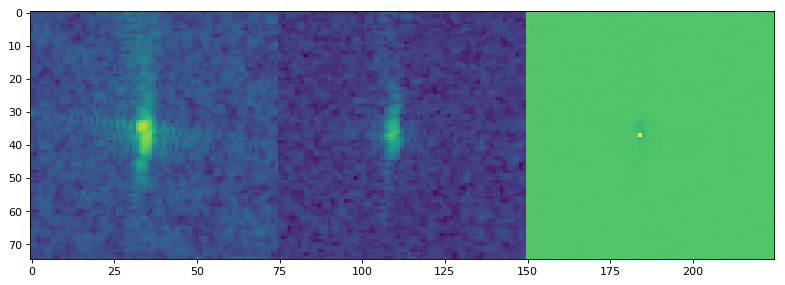

In [23]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
img_concat = np.hstack([iceberg_full_img[0, :, :, 0], iceberg_full_img[0, :, :, 1], iceberg_full_img[0, :, :, 2]])
plt.imshow(img_concat)
plt.show()

### Experiment 1: Number of example

('Iceberg image examples ', 753)
('Non_Iceberg image examples ', 847)


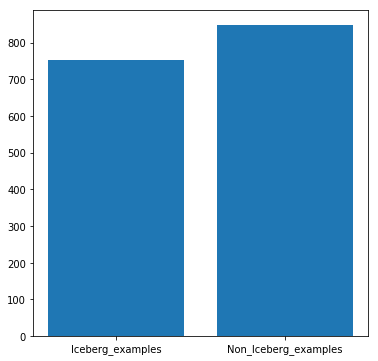

In [70]:
img_ic = [i_img for i_img, i_l in zip(iceberg_full_img, iceberg_full_labels) if i_l == 1]
img_nic = [i_img for i_img, i_l in zip(iceberg_full_img, iceberg_full_labels) if i_l == 0]
class_examples = {'Non_Iceberg_examples':len(img_nic), 'Iceberg_examples':len(img_ic) }
print("Iceberg image examples ", class_examples['Iceberg_examples'])
print("Non_Iceberg image examples ", class_examples['Non_Iceberg_examples'])
plt.figure(figsize=(6,6))
p_b = plt.bar(range(len(class_examples)), class_examples.values(), align='center')
p_b = plt.xticks(range(len(class_examples)), class_examples.keys())

### Experiment 2: Max signal range

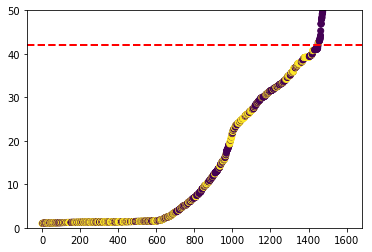

In [100]:
max_val_ic = [np.max(i_img) for i_img, i_l in zip(iceberg_full_img, iceberg_full_labels) if i_l == 1]
max_val_nic = [np.max(i_img) for i_img, i_l in zip(iceberg_full_img, iceberg_full_labels) if i_l == 0]
max_val_list = [np.max(i_img) for i_img in iceberg_full_img]
a_max_val = np.argsort(max_val_list)
s_max_val = [x for x in np.sort(max_val_list)]

axes = plt.gca()
axes.set_ylim([0, 50])
l_s = plt.scatter(range(0, len(s_max_val)), s_max_val, c=iceberg_full_labels[a_max_val])
# h_v = plt.hist((max_val_ic), normed=True, bins=100, range=[0, 50.0], label='Iceberg')
pax = plt.axhline(y=42, color='r', linestyle='dashed', linewidth=2)

### Experiment 3: Histogram for ships

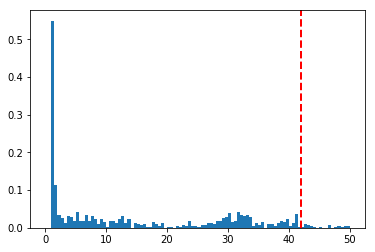

In [77]:
h_v = plt.hist((max_val_nic), normed=True, bins=100, range=[0, 50], label='Boat')
plt.axvline(x=42, color='r', linestyle='dashed', linewidth=2)

### Experiment 3: Histogram for Iceberg

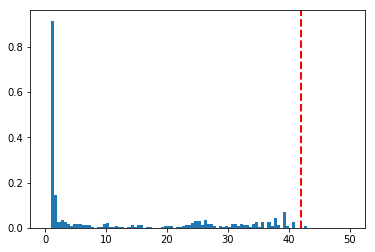

In [75]:
h_v = plt.hist((max_val_ic), normed=True, bins=100, range=[0, 50.0], label='Iceberg')
plt.axvline(x=42, color='r', linestyle='dashed', linewidth=2)

### Experiment 4: Plot std and max

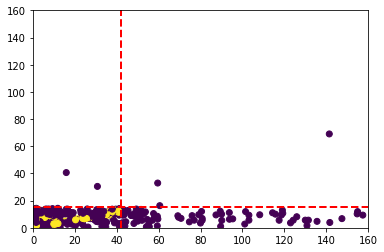

In [119]:
max_val_list = [np.max(i_img) for i_img in iceberg_full_img]
std_val_list = [np.std(i_img) for i_img in iceberg_full_img]

axes = plt.gca()
axes.set_xlim([0, 160])
axes.set_ylim([0, 160])
l_s = plt.scatter(max_val_list, std_val_list, c=iceberg_full_labels)
plt.axvline(x=42, color='r', linestyle='dashed', linewidth=2)
pax = plt.axhline(y=15, color='r', linestyle='dashed', linewidth=2)